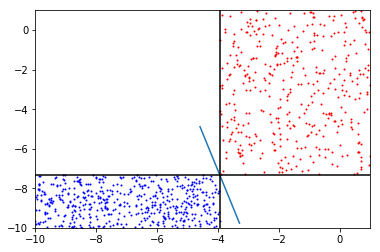

In [74]:
import numpy
from numpy import random
import matplotlib.pyplot as plt

n_label = 1
p_label = -1

def generate_data(min_x, min_y, max_x, max_y, N, P):
    A, B, C, p1, p2 = generate_separating_line(min_x, min_y, max_x, max_y)
           
    n_count = 0
    p_count = 0
    
    p_middle = ((p1[0] + p2[0])/2 , (p1[1] + p2[1])/2)
    
    samples = []
   
    N_rect, P_rect = get_hypothesis_rectangles(A, B, C, (p1, p2), p_middle, min_x, min_y, max_x, max_y)
    
    for i in range(N):
        point = tuple(random.uniform(N_rect[0], N_rect[1]))
        samples.append((point[0], point[1], n_label))
    
    for j in range(P):
        point = tuple(random.uniform(P_rect[0], P_rect[1]))
        samples.append((point[0], point[1], p_label))            
    return samples, p1, p2, p_middle
   

def get_hypothesis_rectangles(A, B, C, line_vector, point_line, min_x, min_y, max_x, max_y):
    p1, p2 = line_vector[0], line_vector[1]
    middle_x, middle_y = point_line[0], point_line[1]
    
    lm_lt =  line_margin(A, B, C, (min_x, max_y))       
    lm_lm = line_margin(A, B, C, (min_x, middle_y))
    lm_mt = line_margin(A, B, C, (middle_x, max_y))

    if lm_lt > 0 and lm_lm > 0 and lm_mt > 0 or lm_lt < 0 and lm_lm < 0 and lm_mt < 0:
        N_rect = [(min_x, middle_y), (middle_x, max_y)]
        P_rect = [(middle_x, min_y), (max_x, middle_y)]
        return N_rect, P_rect
    else:
        N_rect = [point_line, (max_x, max_y)]
        P_rect = [(min_x, min_y), point_line]
        return N_rect, P_rect
    
    
def line_margin(A, B, C, point):
    return A*point[0] + B*point[1] + C
    
def generate_separating_line(min_x, min_y, max_x, max_y):
    p1 = tuple(random.uniform((min_x, min_y), (max_x, max_y), 2))
    p2 = tuple(random.uniform((min_x, min_y), (max_x, max_y), 2))
            
    A = p2[1] - p1[1]
    B = p1[0] - p2[0]
    C = p1[1]*p2[0] - p1[0]*p2[1]
    
    return A, B, C, p1, p2


min_x = -10
min_y = -10
max_x = 1
max_y = 1
N = 400
P = 500

sample = generate_data(min_x, min_y, max_x, max_y, N, P) 

sample_x_n = [p[0] for p in sample[0] if p[2] == n_label]
sample_y_n = [p[1] for p in sample[0] if p[2] == n_label]
sample_x_p = [p[0] for p in sample[0] if p[2] == p_label]
sample_y_p = [p[1] for p in sample[0] if p[2] == p_label]


plt.plot(sample_x_n, sample_y_n, 'ro', sample_x_p, sample_y_p, 'bo', ms=1)
plt.plot([sample[1][0], sample[2][0]], [sample[1][1], sample[2][1]])
plt.plot([min_x, max_x], [sample[3][1], sample[3][1]], 'k')
plt.plot([sample[3][0], sample[3][0]], [min_y, max_y], 'k')

plt.axis([min_x, max_x, min_y, max_y])
plt.show()

parameters:  [ 38.             6.0900130031   1.8264752406] , steps:  75


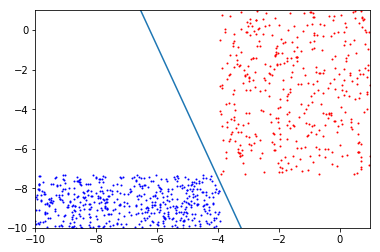

min_margin =  0.868990108581


In [75]:
# batch perceptron function
def batch_perceptron(samples):
    extended_samples = [ (1,) + p for p in samples]
    w = numpy.zeros(3)
    
    steps = 0
    
    not_finish = True
    while not_finish:
        steps += 1
        directions = [es for es in extended_samples if es[3]*numpy.dot(w, es[:3]) <= 0]
        if not len(directions):
            not_finish = False
        else:
            w = w + numpy.array([directions[0][3] * elem for elem in directions[0][:3]])   
    return w, steps

def get_min_margin(w, samples):
    extended_samples = [ (1,) + p for p in samples]
    
    margins = [es[3]*numpy.dot(w, es[:3]) for es in extended_samples]
    
    return min(margins)
    
    
        
def plot_perceptron(w_res, min_x, max_x, min_y, max_y):

    A = w_res[1]
    B = w_res[2]
    C = w_res[0]

    p1x = min_x
    p1y = (-C - A*p1x) / B
    p2x = max_x
    p2y = (-C - A*p2x) / B

    plt.plot([p1x, p2x], [p1y, p2y])
    

res = batch_perceptron(sample[0])
w_res = res[0]
am_steps = res[1]
print "parameters: ", w_res, ", steps: ", am_steps

plot_perceptron(w_res, min_x, max_x, min_y, max_y)
plt.plot(sample_x_n, sample_y_n, 'ro', sample_x_p, sample_y_p, 'bo', ms=1)
plt.axis([min_x, max_x, min_y, max_y])

plt.show()

print "min_margin = ", get_min_margin(w_res, sample[0])

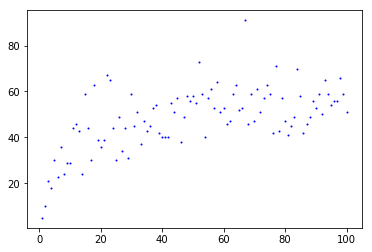

In [83]:
#batch perceptron testing

def test_batch_perceptron():
    min_x = -10
    min_y = -10
    max_x = 1
    max_y = 1
    k_max = 100
    avg_testing = 100
    
    steps = []
        
    for k in range(1, k_max+1):
        avg_steps = 0
        for i in range(avg_testing):
            sample = generate_data(min_x, min_y, max_x, max_y, k, k)[0]
            res = batch_perceptron(sample)
            w_res = res[0]
            am_steps = res[1]
            avg_steps += am_steps
        steps.append((k, avg_steps / avg_testing))
        
    return steps

steps = test_batch_perceptron()
plt.plot([elem[0] for elem in steps], [elem[1] for elem in steps], 'bo', ms=1)
plt.show()
    

In [92]:
# task 4

from scipy.optimize import linprog
from numpy import genfromtxt
basketball_data = genfromtxt('basketball.csv', delimiter=',', skip_header=1)
x_size = 4


def hypothesis(w, x):
    return numpy.dot(w, x)

# absolute difference loss

def compose_lp_task(samples, marks):
    m = len(samples)
    d = x_size
    A = numpy.zeros((2*m, m+d))
    Y = numpy.zeros(2*m)
    for i in range(m):
        zeros_m = numpy.zeros(m)
        A_i = numpy.concatenate((samples[i], zeros_m))
        A_i[i+d] = -1
        A_i1 = numpy.concatenate((numpy.multiply(-1, samples[i]), zeros_m))
        A_i1[i+d] = -1
        A[2*i] = A_i
        A[2*i + 1] = A_i1
        Y[2*i] = marks[i]
        Y[2*i + 1] = -1*marks[i]
    
    C = numpy.concatenate((numpy.zeros(d), numpy.ones(m)))
    D = [(None, None)]*(m+d)
    
    return C, A, Y, D

C, A, Y, D = compose_lp_task(basketball_data[:,:x_size], basketball_data[:,x_size])

solution = linprog(C, A_ub=A, b_ub=Y, bounds=D,
              options={"disp": True, "tol": 10**-10})

w_lp = solution.x[:x_size]

numpy.set_printoptions(suppress=True, precision=10)
print "abs w: ", w_lp

X = numpy.transpose(basketball_data[:, :x_size])
Y = basketball_data[:, x_size]
# calculate mean square error
print "abs mse: ", numpy.average(numpy.square(numpy.dot(w_lp, X) - Y))


Optimization terminated successfully.
         Current function value: 208.953912  
         Iterations: 167
 [  0.6549855463   0.2266934945   4.4929371401   0.            10.9170491502
  16.1574107125   3.3669071676   5.1449583886   6.0244323729   0.0340117124
  10.056485894    2.4386483844   0.             2.890067923    8.7465714412
  10.9674301437   5.4202424719   0.6768406494   1.0431285468   0.
   1.2078665447   1.2603416011  10.6064819669   0.206753608   12.6743280012
   1.8246349224   6.3175377082   0.3628038801   2.2448589657  11.828964322
   2.1771040531   1.7553227031   2.6690426344   1.2603416011   2.7584311226
   3.3486215204  -0.             1.0530955527   3.2047145119   2.1692106891
   1.195885806    5.5710490876   2.8785138538   6.4216892704   8.378931213
   2.3176799782   2.5760472454   2.0179387205   6.1130446471   2.103456304
   4.5462765567   1.3141145452   4.1930349028   1.1369929957]
abs w:  [ -2.8324522345   0.01055643    30.7481879419  17.6187408088]
abs mse:  2

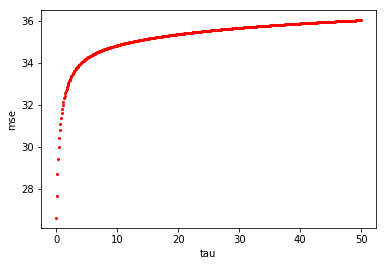

In [88]:
# rigde regression


X = numpy.transpose(basketball_data[:, :x_size])
Y = basketball_data[:, x_size]

taus = numpy.arange(0, 50, 0.1)
mse = []
for tau in taus:
    XXt_tau = numpy.dot(X, numpy.transpose(X)) + numpy.dot(tau, numpy.identity(len(X)))
    
    w = numpy.dot(numpy.dot(numpy.linalg.inv(XXt_tau), X), Y)
    mse.append(numpy.average(numpy.square(numpy.dot(w, X) - Y)))
    
plt.plot(taus, mse, 'ro', ms=2)
plt.xlabel("tau")
plt.ylabel("mse")
plt.show()
